# Data Science Project - Phase 2
## Team 4: Member task (Reetika Sarkar)

**Brief overview**

* The goal is to convert the daily number of COVID-19 new cases and deaths to a weekly format and generate weekly statistics for a specific state. I will be working with the state of North Carolina (NC). 

* I will then compare the weekly averages of COVID-19 cases and deaths in NC with the states Florida (FL), Colorado (CO), Washington (WA), Arizona (AZ) and Michigan (MI).

* I will be working with data starting from 01/26/2020 to 02/05/2022 which covers a total of 106 weeks (week starting on Sunday amd ending on Saturday).

* Raw counts (weekly averages) are scaled (normalized) to counts per 100,000 persons in the state/county and lognormalized by taking log to the base 2.

* The first section focuses on comparison of weekly averages of new COVID-19 cases and deaths amongst the states mentioned above. 

* The second section focuses on new COVID-19 cases and deaths in the state of NC. It involves selction of five counties with high incidence of COVID-19 cases and death. I have chosen to study Robeson County, Chowan County, Guilford County, Rowan County and Gaston County. 

Import required libraries.

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from IPython.display import Image

Read csv files. Change column names to lower case and replace spaces with an underscore. Also remove counties with `countyfips=0`.

In [2]:
f1 = pd.read_csv("../../../../data/stage_2/covid_confirmed_usafacts.csv")
f2 = pd.read_csv("../../../../data/stage_2/covid_deaths_usafacts.csv")
f3 = pd.read_csv("../../../../data/stage_2/covid_county_population_usafacts.csv")

f1.columns = f1.columns.str.replace(' ', '_')
f1.columns = f1.columns.str.lower()

f2.columns = f2.columns.str.replace(' ', '_')
f2.columns = f2.columns.str.lower()

f3.columns = f3.columns.str.replace(' ', '_')
f3.columns = f3.columns.str.lower()

f1_1 = f1[f1['countyfips'] != 0]
f2_1 = f2[f2['countyfips'] != 0]
f3_1 = f3[f3['countyfips'] != 0]

### Section 1: Comparison of NC with Florida (FL), Colorado (CO), Washington (WA), Arizona (AZ) and Michigan (MI)

**Filter counts by selected states.**

In [3]:
#select data from the states chosen
cases_states = f1_1.query("state == 'NC' | state == 'GA' | state == 'CO' | state == 'WA' | state == 'AZ' | state =='MI'")
#drop extra columns
cases_states_filt = cases_states.drop(columns = ['countyfips','statefips','2020-01-22','2020-01-23','2020-01-24',
                                                 '2022-02-06','2022-02-07'])
#total cases by state
cases_states_total = cases_states_filt.groupby('state').sum()
#new daily cases by state
new_cases_daily = cases_states_total.diff(axis=1)
#delete data for 2020-01-25
new_cases_daily = new_cases_daily.drop(columns = ['2020-01-25'])
new_cases_daily

,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,...,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05
state,,,,,,,,,,,,,,,,,,,,,
AZ,1,0,0,0,0,0,0,0,0,0,...,14293,15610,0,0,41238,7489,8407,4794,12077,0
CO,0,0,0,0,0,0,0,0,0,0,...,7727,4148,4604,3975,2996,6007,3235,1079,4731,1740
GA,0,0,0,0,0,0,0,0,0,0,...,15410,15495,0,0,17238,5160,5355,5456,6957,0
MI,0,0,0,0,0,0,0,0,0,0,...,0,30909,0,0,22854,0,23715,0,11808,0
NC,0,0,0,0,0,0,0,0,0,0,...,27553,21161,0,0,47850,9127,12362,14980,12420,0
WA,0,0,0,0,0,0,0,0,0,0,...,0,36619,0,0,45191,0,15629,0,11572,0


In [4]:
#select data from the states chosen
deaths_states = f2_1.query("state == 'NC' | state == 'GA' | state == 'CO' | state == 'WA' | state == 'AZ' | state == 'MI'")
#drop extra columns
deaths_states_filt = deaths_states.drop(columns = ['countyfips','statefips','2020-01-22','2020-01-23',
                                                   '2020-01-24','2022-02-06','2022-02-07'])
#total cases by state
deaths_states_total = deaths_states_filt.groupby('state').sum()
#new daily cases by state
new_deaths_daily = deaths_states_total.diff(axis=1)
#delete data for 2020-01-25
new_deaths_daily = new_deaths_daily.drop(columns = ['2020-01-25'])
new_deaths_daily

,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,...,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05
state,,,,,,,,,,,,,,,,,,,,,
AZ,0,0,0,0,0,0,0,0,0,0,...,33,69,0,0,204,140,24,61,100,0
CO,0,0,0,0,0,0,0,0,0,0,...,55,3,43,14,16,17,1,1,182,6
GA,0,0,0,0,0,0,0,0,0,0,...,102,137,0,0,104,78,105,123,107,0
MI,0,0,0,0,0,0,0,0,0,0,...,0,209,0,0,62,0,374,0,236,0
NC,0,0,0,0,0,0,0,0,0,0,...,77,78,0,0,162,60,87,123,70,0
WA,0,0,0,0,0,0,0,0,0,0,...,0,119,0,0,77,0,69,0,122,0


**Change daily counts to weekly averages.**

In [5]:
#transpose data to convert to long format
new_cases_daily_m = new_cases_daily.T.reset_index()
#create new column 'week' with dates in datetime format
new_cases_daily_m['week'] = pd.to_datetime(new_cases_daily_m['index'])
#drop 'index' column
new_cases_daily_m = new_cases_daily_m.drop(columns = ['index'])
#resample data to show weekly average number of new cases
new_cases_weekly_avg = new_cases_daily_m.resample('W-Sun',on='week',label='left',closed='left').mean()
new_cases_weekly_avg = new_cases_weekly_avg.round(0).astype(int)
new_cases_weekly_avg.head()

state,AZ,CO,GA,MI,NC,WA
week,,,,,,
2020-01-26,0,0,0,0,0,0
2020-02-02,0,0,0,0,0,0
2020-02-09,0,0,0,0,0,0
2020-02-16,0,0,0,0,0,0
2020-02-23,0,0,0,0,0,1


In [6]:
#transpose data to convert to long format
new_deaths_daily_m = new_deaths_daily.T.reset_index()
#create new column 'week' with dates in datetime format
new_deaths_daily_m['week'] = pd.to_datetime(new_deaths_daily_m['index'])
#drop 'index' column
new_deaths_daily_m = new_deaths_daily_m.drop(columns = ['index'])
#resample data to show weekly average number of new cases
new_deaths_weekly_avg = new_deaths_daily_m.resample('W-Sun',on='week',label='left',closed='left').mean()
new_deaths_weekly_avg = new_deaths_weekly_avg.round(0).astype(int)
new_deaths_weekly_avg.head()

state,AZ,CO,GA,MI,NC,WA
week,,,,,,
2020-01-26,0,0,0,0,0,0
2020-02-02,0,0,0,0,0,0
2020-02-09,0,0,0,0,0,0
2020-02-16,0,0,0,0,0,0
2020-02-23,0,0,0,0,0,0


**Compute weekly statistics (mean, median, mode) of new cases and deaths for all chosen states.**

In [7]:
print(new_cases_weekly_avg.mean().round(0).astype(int))
print(new_cases_weekly_avg.median().round(0).astype(int))
print(new_cases_weekly_avg.mode().round(0).astype(int))

state
AZ    2565
CO    1720
GA    2422
MI    3036
NC    3327
WA    1838
dtype: int32
state
AZ    1306
CO    1046
GA    1397
MI    1453
NC    1835
WA     881
dtype: int32
state  AZ  CO  GA  MI  NC  WA
0       0   0   0   0   0   0


In [8]:
print(new_deaths_weekly_avg.mean().round(0).astype(int))
print(new_deaths_weekly_avg.median().round(0).astype(int))
print(new_deaths_weekly_avg.mode().round(0).astype(int))

state
AZ    36
CO    15
GA    43
MI    44
NC    28
WA    15
dtype: int32
state
AZ    24
CO    10
GA    32
MI    30
NC    21
WA    10
dtype: int32
state  AZ  CO  GA  MI  NC  WA
0       0   4   0   0   0   8


The mean, median and mode of average number of **new cases** per week is shown below:

|State | Mean | Median | Mode |
|------|------|--------|------|
|AZ|2565 |1306 |0 |
|CO|1720 |1046 |0 |
|GA|2422 |1397 |0 |
|MI|3036 |1453 |0 |
|NC|3327 |1835 |0 |
|WA|1838 |881 |0 |

The mean, median and mode of average number of **deaths** per week is shown below:

|State | Mean | Median | Mode |
|------|------|--------|------|
|AZ|36 |24 |0 |
|CO|15 |10 |4 |
|GA|43 |32 |0 |
|MI|44 |30 |0 |
|NC|28 |21 |0 |
|WA|15 |10 |8 |

Based on the tables above, North Carolina has the highest mean and median number of new cases per week, followed by Michigan. The lowest mean number of new cases were in Colorado while the median was lowest for Washington.

With regard to the number of deaths, Colorado and Washington had the lowest mean while Michigan and Georgia had the highest. The lowest median number of deaths were in Colorado and Washington while the highest was in Georgia and Michigan. The mode number of deaths were 0 in three of the states while Colorado had a mode of 4 and Washington had a mode of 8.

**Scaling counts (number of counts per 100,000 persons).**

In [9]:
#compute total populations of the selected states
county_pop = f3.query("state == 'NC' | state == 'GA' | state == 'CO' | state == 'WA' | state == 'AZ' | state == 'MI'")
county_pop = county_pop.drop(columns = ['countyfips'])
pop_states = county_pop.groupby('state').sum()
#convert state total populations to a series
p = pop_states.squeeze()

In [10]:
#compute scaled counts per 100,000 persons in each state
scaled_cases_byweek = new_cases_weekly_avg.div(p/100000, axis='columns')
scaled_cases_byweek.head()

state,AZ,CO,GA,MI,NC,WA
week,,,,,,
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.000000
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.000000
2020-02-09,0.0,0.0,0.0,0.0,0.0,0.000000
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.000000
2020-02-23,0.0,0.0,0.0,0.0,0.0,0.013132


In [11]:
#compute scaled counts per 100,000 persons in each state
scaled_deaths_byweek = new_deaths_weekly_avg.div(p/100000, axis='columns')
scaled_deaths_byweek.head()

state,AZ,CO,GA,MI,NC,WA
week,,,,,,
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,0.0,0.0,0.0


Log scaled weekly average counts.

In [12]:
logscaled_cases_states = np.log2(scaled_cases_byweek)
logscaled_deaths_states = np.log2(scaled_deaths_byweek)

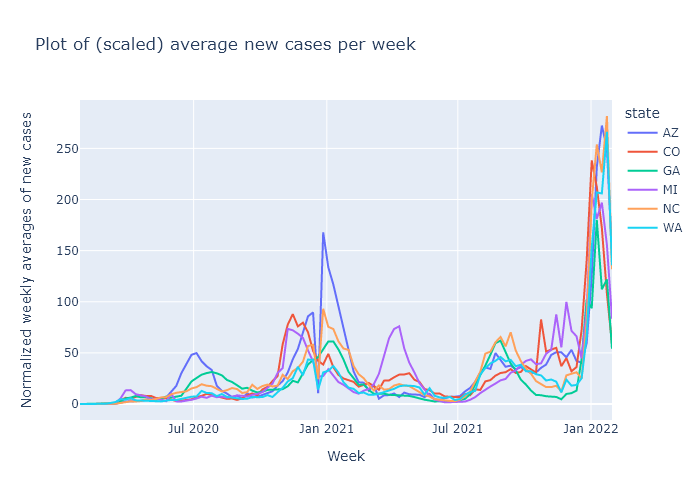

In [13]:
fig_cases_states = px.line(scaled_cases_byweek, title="Plot of (scaled) average new cases per week", 
                           labels={"week": "Week","value":"Normalized weekly averages of new cases"})
#fig_cases_states.show()
fig_cases_states.write_image("images/cases_states.png",engine="kaleido")
Image(filename="images/cases_states.png")

Preliminary observations about new cases from the data:

* All of the chosen states had the highest peak in number of new cases during January 2022. This is likely due to the highly infectious Omicron variant that caused a huge spike in new cases.
* Washington and North Carolina have the lowest number of new cases compared with the rest of the states chosen for comparison. NC however, has sharper peaks around January 2021 and August 2021. This coincides with the academic semester commencement in educational institutions which are much more prevalent in NC.
* Colorado has a peak in cases in November 2020 which could be due to annual festivals that are celebrated across the state around that time.
* Michigan has a peak in cases in May 2021 and two peaks in November 2021.
* Arizona shows the highest number of new cases amongst all chosen states with the sharp peaks in July 2020 and January 2021. The first peak coincides with the end of lockdown declared in the state. The second peak coincides with the year end holiday season which could possibly be attributed to flouting of social distancing norms followed in other states.

Peaks in cases and comparison with the US pattern:

* Compared with the plot for the whole of the USA, states such as Washington and Colorado are flatter while Arizona, North Carolina and Georgia follow a similar pattern.
* There are peaks in December 2020-January 2021 which coincides with Christmas and New year holidays. Arizona has the sharpest peak likely resulting from flouting of safety norms and winter tourism.
* November 2020 peak in Colorado could possibly be a due to large scale socializing during their Fall holidays.
* There is again a peak in August 2021, possibly due to opening of schools and universities and resumption of in-person classes.
* The sharpest peak in cases is observed during December 2021-January 2022. It could be due to the spread of the highly inectious omicron variant, holiday season and resumption of in-person classes after winter break.

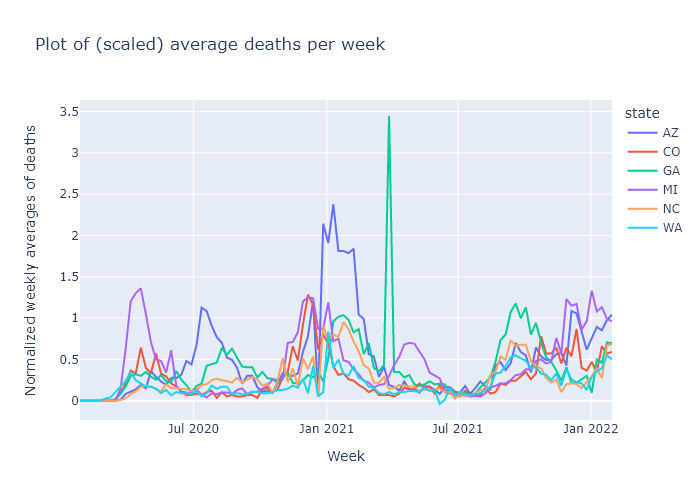

In [14]:
fig_deaths_states = px.line(scaled_deaths_byweek, title="Plot of (scaled) average deaths per week",
                           labels={"week": "Week","value":"Normalized weekly averages of deaths"})
#fig_deaths_states.show()
fig_deaths_states.write_image("images/deaths_states.png",engine="kaleido")
Image(filename="images/deaths_states.png")

Preliminary observations about deaths from the data:

* Compared with the plots for cases, deaths had more frequent peaks.
* The tallest peak is in Georgia whic recorded highest number of deaths in April 2021. This coincides with the removal of mask mandates in the state.
* Deaths were lowest from May 2021 to end of July 2021 across all these 5 states. Washington had a steep decline around June 2021 and also had the lowest number of deaths throughout the study period.
* Colorado, Washington and North Carolina show a decline in deaths after the rollout of the COVID-19 vaccine in January 2021.

Peaks in deaths and comparison with the US pattern:

* The peaks vary to certain degree from the overall US pattern. For example, North Carolina did not have a peak in deaths until January 2021. Also Washington had lower death counts compared with the overall US pattern and also the rest of the states used for comparison.
* Arizona and Georgia have shown the sharpest peaks in number of deaths, compared with the rest of the states being studied.
* April 2020: Air travel in Chicago, IL/ infections spread during spring break

### Section 2: For state of North Carolina (NC)

**Task**: Identify five counties in NC with highest number of new cases and deaths and plot raw values and log normalized values.

Filter cases by NC counties.

In [15]:
#filter NC cases and drop columns not needed
cases_NC = f1_1.query("state == 'NC'")
cases_NC_filt = cases_NC.drop(columns = ['countyfips','statefips','state','2020-01-22','2020-01-23',
                                         '2020-01-24','2022-02-06','2022-02-07'])
#set county_name as index
cases_NC_filt.set_index('county_name', inplace=True)
#new daily cases by county
new_cases_NC = cases_NC_filt.diff(axis=1)
#delete data for 2020-01-25
new_cases_daily_NC = new_cases_NC.drop(columns = ['2020-01-25'])
new_cases_daily_NC.head()

,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,...,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05
county_name,,,,,,,,,,,,,,,,,,,,,
Alamance County,0,0,0,0,0,0,0,0,0,0,...,480,304,0,0,757,120,160,251,126,0
Alexander County,0,0,0,0,0,0,0,0,0,0,...,146,126,0,0,265,58,-14,33,-12,0
Alleghany County,0,0,0,0,0,0,0,0,0,0,...,18,34,0,0,57,12,5,24,28,0
Anson County,0,0,0,0,0,0,0,0,0,0,...,181,42,0,0,147,36,27,38,22,0
Ashe County,0,0,0,0,0,0,0,0,0,0,...,40,74,0,0,127,34,17,51,66,0


In [16]:
#filter NC cases and drop columns not needed
deaths_NC = f2_1.query("state == 'NC'")
deaths_NC_filt = deaths_NC.drop(columns = ['countyfips','state','statefips','2020-01-22','2020-01-23',
                                           '2020-01-24','2022-02-06','2022-02-07'])
#set county_name as index
deaths_NC_filt.set_index('county_name', inplace=True)
#new daily cases by county
new_deaths_NC = deaths_NC_filt.diff(axis=1)
#delete data for 2020-01-25
new_deaths_daily_NC = new_deaths_NC.drop(columns = ['2020-01-25'])
new_deaths_daily_NC.head()

,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,...,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05
county_name,,,,,,,,,,,,,,,,,,,,,
Alamance County,0,0,0,0,0,0,0,0,0,0,...,2,9,0,0,26,1,0,0,0,0
Alexander County,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,0,0
Alleghany County,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anson County,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Ashe County,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Change daily counts to weekly averages.

In [17]:
#transpose data to convert to long format
new_cases_daily_NC_m = new_cases_daily_NC.T.reset_index()
#create new column 'week' with dates in datetime format
new_cases_daily_NC_m['week'] = pd.to_datetime(new_cases_daily_NC_m['index'])
#drop 'index' column
new_cases_daily_NC_m = new_cases_daily_NC_m.drop(columns = ['index'])
#resample data to show weekly average number of new cases
new_cases_weekly_avg_NC = new_cases_daily_NC_m.resample('W-Sun',on='week',label='left',closed='left').mean()
new_cases_weekly_avg_NC.head()

county_name,Alamance County,Alexander County,Alleghany County,Anson County,Ashe County,Avery County,Beaufort County,Bertie County,Bladen County,Brunswick County,...,Vance County,Wake County,Warren County,Washington County,Watauga County,Wayne County,Wilkes County,Wilson County,Yadkin County,Yancey County
week,,,,,,,,,,,,,,,,,,,,,
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#transpose data to convert to long format
new_deaths_daily_NC_m = new_deaths_daily_NC.T.reset_index()
#create new column 'week' with dates in datetime format
new_deaths_daily_NC_m['week'] = pd.to_datetime(new_deaths_daily_NC_m['index'])
#drop 'index' column
new_deaths_daily_NC_m = new_deaths_daily_NC_m.drop(columns = ['index'])
#resample data to show weekly average number of new cases
new_deaths_weekly_avg_NC = new_deaths_daily_NC_m.resample('W-Sun',on='week',label='left',closed='left').mean()
new_deaths_weekly_avg_NC.head()

county_name,Alamance County,Alexander County,Alleghany County,Anson County,Ashe County,Avery County,Beaufort County,Bertie County,Bladen County,Brunswick County,...,Vance County,Wake County,Warren County,Washington County,Watauga County,Wayne County,Wilkes County,Wilson County,Yadkin County,Yancey County
week,,,,,,,,,,,,,,,,,,,,,
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Scale counts (number of counts per 100,000 persons in a county).

In [19]:
#extract county wise populations for NC
county_pop_NC = county_pop[county_pop['state'] == 'NC'].drop(columns = ['state'])
county_pop_NC = county_pop_NC.drop(labels=1924, axis=0)
county_pop_NC.set_index('county_name', inplace=True)
county_pop_NC.head()

,population
county_name,
Alamance County,169509
Alexander County,37497
Alleghany County,11137
Anson County,24446
Ashe County,27203


In [20]:
#divide counts by county population and multiply by 100,000
scaled_cases_NC = new_cases_weekly_avg_NC/county_pop_NC.values[:,0] 
scaled_cases_NC = scaled_cases_NC*100000
scaled_cases_NC.head()

county_name,Alamance County,Alexander County,Alleghany County,Anson County,Ashe County,Avery County,Beaufort County,Bertie County,Bladen County,Brunswick County,...,Vance County,Wake County,Warren County,Washington County,Watauga County,Wayne County,Wilkes County,Wilson County,Yadkin County,Yancey County
week,,,,,,,,,,,,,,,,,,,,,
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#divide counts by county population and multiply by 100,000
scaled_deaths_NC = new_deaths_weekly_avg_NC/county_pop_NC.values[:,0] 
scaled_deaths_NC = scaled_deaths_NC*100000
scaled_deaths_NC.head()

county_name,Alamance County,Alexander County,Alleghany County,Anson County,Ashe County,Avery County,Beaufort County,Bertie County,Bladen County,Brunswick County,...,Vance County,Wake County,Warren County,Washington County,Watauga County,Wayne County,Wilkes County,Wilson County,Yadkin County,Yancey County
week,,,,,,,,,,,,,,,,,,,,,
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#mean normalized counts for NC counties and print counties with top 10 counts
NC_cases_means = scaled_cases_NC.mean()
print(NC_cases_means.sort_values(ascending=False).head(15))

NC_deaths_means = scaled_deaths_NC.mean()
print(NC_deaths_means.sort_values(ascending=False).head(15))

county_name
Stanly County        40.034718
Robeson County       39.624963
Chowan County        38.769708
Cleveland County     38.709807
Catawba County       38.091226
Nash County          37.250721
Rowan County         37.205977
Gaston County        37.200365
Pitt County          37.114899
Scotland County      37.091698
Surry County         37.025712
Sampson County       36.972845
Columbus County      36.909762
Franklin County      36.668667
Bladen County        36.614914
dtype: float64
county_name
Rutherford County      0.737903
Columbus County        0.609417
Montgomery County      0.570370
Surry County           0.551978
Jones County           0.543719
Northampton County     0.511885
Richmond County        0.511077
Robeson County         0.508647
Rowan County           0.508398
Washington County      0.488806
Anson County           0.485144
Martin County          0.480467
Graham County          0.478987
Duplin County          0.477219
Stanly County          0.476374
dtype: float64


Based on mean weekly new case and death counts, select _Robeson County_, _Stanly County_, _Columbus County_, _Rowan County_ and _Surry County_. The top five counties for cases and deaths are not common so counties that are common in top 15 of the mean counts of cases and deaths have been chosen.

In [23]:
#subset data for chosen counties
top5_raw_cases_NC = new_cases_weekly_avg_NC[['Robeson County ', 'Stanly County ', 'Columbus County ', 
                                             'Rowan County ', 'Surry County ']]
top5_raw_deaths_NC = new_deaths_weekly_avg_NC[['Robeson County ', 'Stanly County ', 'Columbus County ', 
                                               'Rowan County ', 'Surry County ']]

Plot of raw numbers of cases and deaths in selected NC counties.

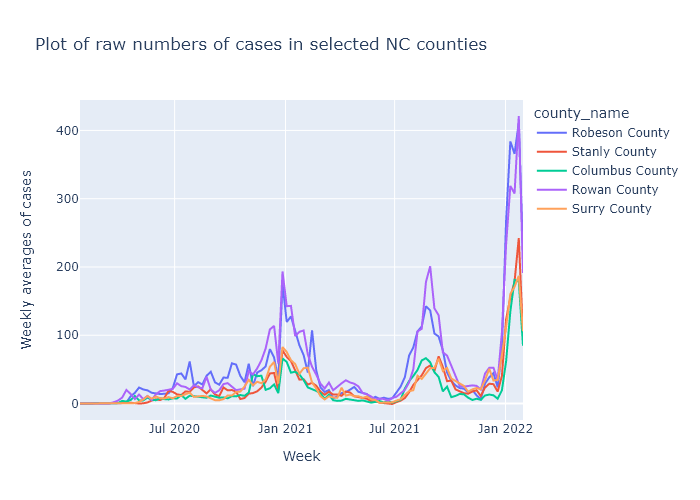

In [24]:
fig_raw_cases_NC = px.line(top5_raw_cases_NC, title = "Plot of raw numbers of cases in selected NC counties",
                          labels={"week": "Week","value":"Weekly averages of cases"})
#fig_raw_cases_NC.show()
fig_raw_cases_NC.write_image("images/raw_cases_NC.png",engine="kaleido")
Image(filename="images/raw_cases_NC.png")

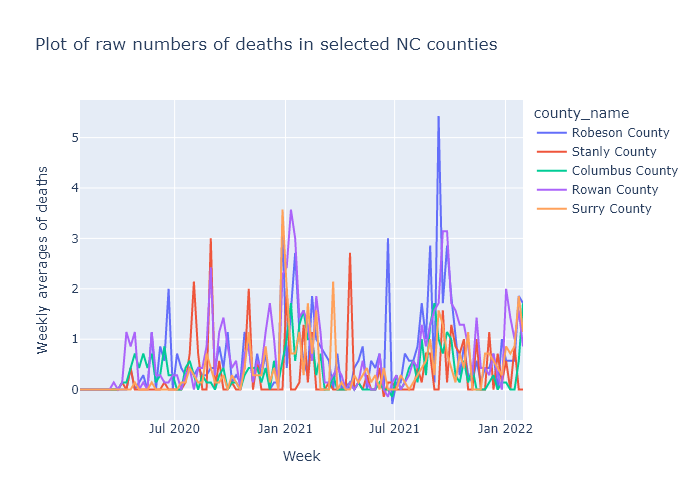

In [25]:
fig_raw_deaths_NC = px.line(top5_raw_deaths_NC, title="Plot of raw numbers of deaths in selected NC counties",
                           labels={"week": "Week","value":"Weekly averages of deaths"})
#fig_raw_deaths_NC.show()
fig_raw_deaths_NC.write_image("images/raw_deaths_NC.png",engine="kaleido")
Image(filename="images/raw_deaths_NC.png")

**Summary**

* From the plots of raw cases and deaths above, it is seen that Rowan and Robeson counties have the tallest peaks of average counts of new cases per week. Surry, Columbus and Stanly counties have shorter peaks and thus lower number of cases. 
* The trends in counts of cases and deaths vary by various factors such as tourism, observance of covid safety norms, commencement of academic semesters and celebration of major holidays.
* The cases peak around January 2021, August-September 2021 and then show sharpest rise in January 2022.
* Deaths are more random and there has seems to have been a decline since commencement of COVID-19 vaccination as the peaks towards end of 2021 are not as high as the peaks for cases are.
* Compared with the plot of cases in NC, the county plots follow the trend closely (to varying degrees sharpness of the peaks). Rowan county has an almost identical plot of cases compared with the whole state. 

Log scaled weekly average counts.

In [26]:
log_scaled_cases_NC = np.log2(scaled_cases_NC)
log_scaled_deaths_NC = np.log2(scaled_deaths_NC)

In [27]:
top5_log_scaled_cases_NC = log_scaled_cases_NC[['Robeson County ', 'Stanly County ', 'Columbus County ',
                                                'Rowan County ', 'Surry County ']]
top5_log_scaled_deaths_NC = log_scaled_deaths_NC[['Robeson County ', 'Stanly County ', 'Columbus County ',
                                                  'Rowan County ', 'Surry County ']]

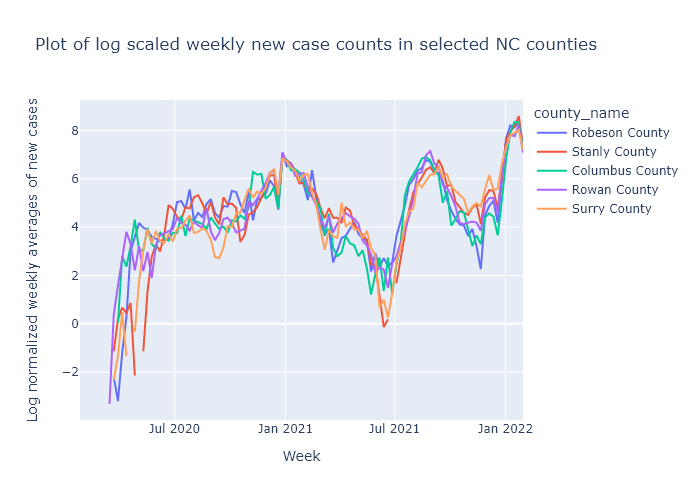

In [28]:
fig_logscaled_cases_NC = px.line(top5_log_scaled_cases_NC, title="Plot of log scaled weekly new case counts in selected NC counties",
                                labels={"week": "Week","value":"Log normalized weekly averages of new cases"})
#fig_logscaled_cases_NC.show()
fig_logscaled_cases_NC.write_image("images/log_cases_NC.png",engine="kaleido")
Image(filename="images/log_cases_NC.png")

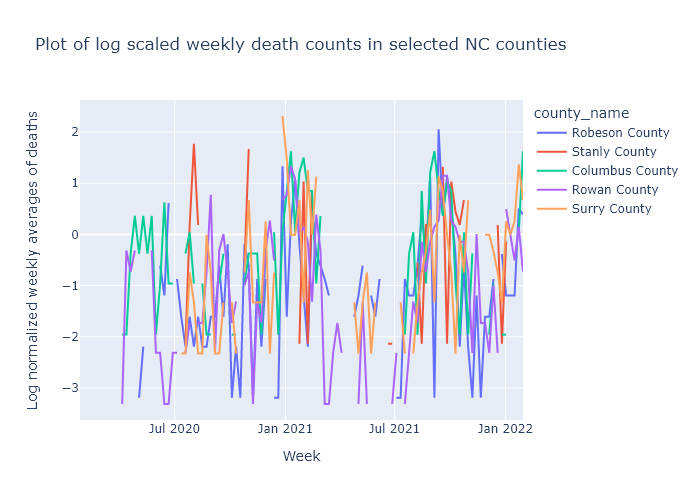

In [29]:
fig_logscaled_deaths_NC = px.line(top5_log_scaled_deaths_NC, title="Plot of log scaled weekly death counts in selected NC counties",
                                 labels={"week": "Week","value":"Log normalized weekly averages of deaths"})
#fig_logscaled_deaths_NC.show()
fig_logscaled_deaths_NC.write_image("images/log_deaths_NC.png",engine="kaleido")
Image(filename="images/log_deaths_NC.png")

**Summary**

* The plots for the log scaled counts of cases and deaths in the selected counties in NC show an increasing trend followed by a decreasing trend after January 2021 when COVID-19 vaccines were rolled out. There are again peaks in cases in August 2021 (coinciding with resumption of face-to-face instruction in educational institutions), followed by sharpest peaks in January 2022 (coinciding with the spread of infectious Omicron variant).
* Deaths are more random and there has seems to have been a decline since commencement of COVID-19 vaccination, although there have been peaks in deaths intermittently throughout 2021. The peaks after the end of 2021 are not as high as the peaks for cases are, indicating efficacy of the vaccine against death due to COVID-19.